In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.2, style="darkgrid", palette="colorblind", color_codes=True)

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
def head_shape(df, n=5):
    return display(df.head(n), df.shape)

In [6]:
head_shape(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


(48895, 16)

In [7]:
def na_per_col(df, ascending=True):
    return (df.isna().sum()/df.shape[0]).sort_values(ascending=True)
def total_na_df(dataframe):
    percent_na = round(((dataframe.isna().sum().sum()) /
                        (np.prod(dataframe.shape))) * 100, 2)
    print("The dataframe is made up of {0}% missing values.".format(percent_na))
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
total_na_df(df)

The dataframe is made up of 2.57% missing values.


In [9]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
last_review,10052,20.6
reviews_per_month,10052,20.6
host_name,21,0.0
name,16,0.0


In [10]:
def desbribe_object(df):
    return df.astype("object").describe().T

def cat_value_counts(df, cols):
    for col in cols:
        value = df[col].value_counts(normalize=True)*100
        print("\n" "For"+" "+col)
        print(value)
        print("Unique values: ",df[col].unique())
        print("Number of unique values: ",df[col].nunique())

In [11]:
desbribe_object(df)

,count,unique,top,freq
id,48895,48895,9990200,1
name,48879,47905,Hillside Hotel,18
host_id,48895,37457,219517861,327
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
latitude,48895,19048,40.7181,18
longitude,48895,14718,-73.9568,18
room_type,48895,3,Entire home/apt,25409
price,48895,674,100,2051


In [12]:
cols = ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
cat_value_counts(df, cols)


For host_name
Michael           0.853214
David             0.824569
Sonder (NYC)      0.669067
John              0.601547
Alex              0.570856
                    ...   
Redding           0.002046
Ugi               0.002046
Mahalia           0.002046
Demetrios John    0.002046
T. & Marnie       0.002046
Name: host_name, Length: 11452, dtype: float64
Unique values:  ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
Number of unique values:  11452

For neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64
Unique values:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Number of unique values:  5

For neighbourhood
Williamsburg          8.017180
Bedford-Stuyvesant    7.595869
Harlem                5.436139
Bushwick              5.041415
Upper West Side       4.031087
                        ...   
Richmondtown

In [13]:
df.drop(['id', 'last_review'], axis=1, inplace=True)

In [14]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
df['reviews_per_month'].fillna(0, inplace=True)

In [16]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
host_name,21,0.0
name,16,0.0


## Exploring

In [17]:
top_host = df['host_id'].value_counts().head(10)
df_top_host = pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={"index":"Host_Id", "host_id":"Count"}, inplace=True)

In [18]:
df_top_host

,Host_Id,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


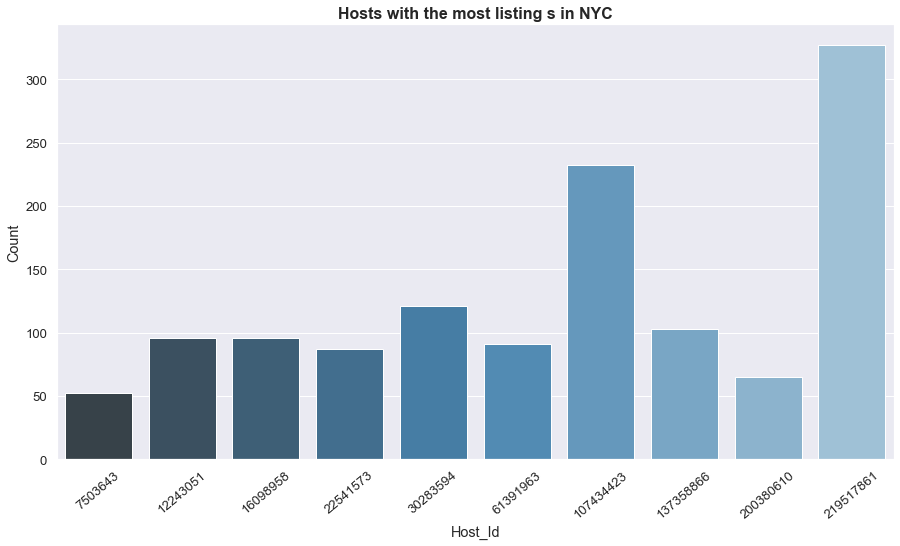

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='Host_Id', y="Count", data=df_top_host, palette="Blues_d")
plt.title("Hosts with the most listing s in NYC", fontsize=16, fontweight="bold")
plt.xticks(rotation=40)
plt.show()

In [20]:
neighbourhood_group = df['neighbourhood_group'].unique()
neighbourhood_group

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
brook = df[df['neighbourhood_group']=="Brooklyn"]
brook = brook[['price']]

manha = df[df['neighbourhood_group']=="Manhattan"]
manha = manha[['price']]

queens = df[df['neighbourhood_group']=="Queens"]
queens = queens[['price']]

staten = df[df['neighbourhood_group']=="Staten Island"]
staten = staten[['price']]

bronx = df[df['neighbourhood_group']=="Bronx"]
bronx = bronx[['price']]

price_list_by_n = [brook, manha, queens, staten, bronx]

In [22]:
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [23]:
p_l_b_n_2 = []

for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={"index":"Stats"}, inplace=True)
    p_l_b_n_2.append(i)

In [24]:
for i in range(len(nei_list)):
    p_l_b_n_2[i].rename(columns={'price':nei_list[i]}, inplace=True)
    p_l_b_n_2[i].set_index('Stats', inplace=True)
    
stats_df = p_l_b_n_2[0].join(p_l_b_n_2[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


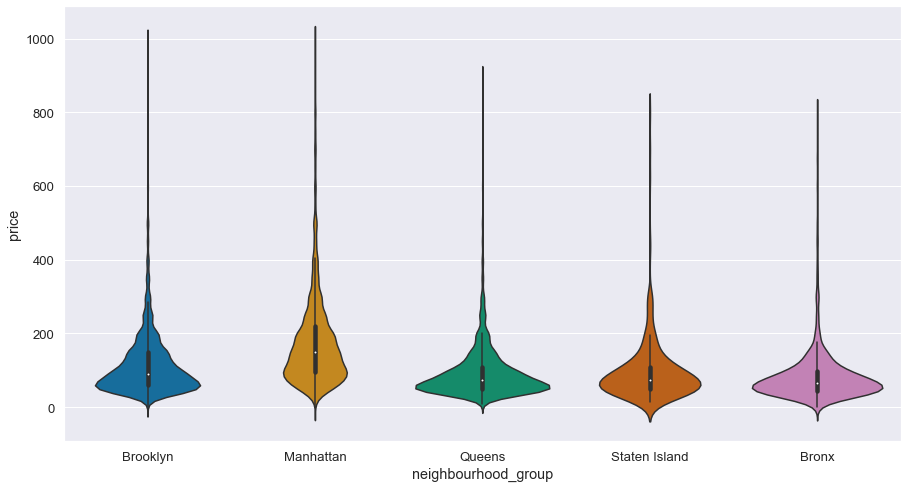

In [25]:
sub_df = df[df['price']<1000]
plt.figure(figsize=(15,8))
sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')

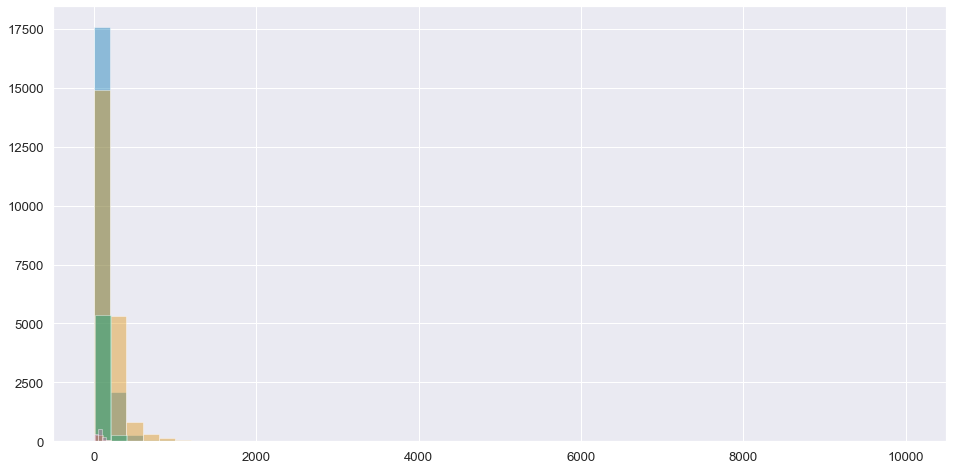

In [26]:
plt.figure(figsize=(16,8))
for nei in price_list_by_n:
    sns.distplot(a=nei, hist=True, kde=False)

Let's now combine this with ou boroughs and room type for a rich visualization

In [27]:
top_neighbourhood = df['neighbourhood'].value_counts().head(10).keys()
top_neighbourhood

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

In [31]:
df_top_neighbourhood.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0


<Figure size 1080x576 with 0 Axes>

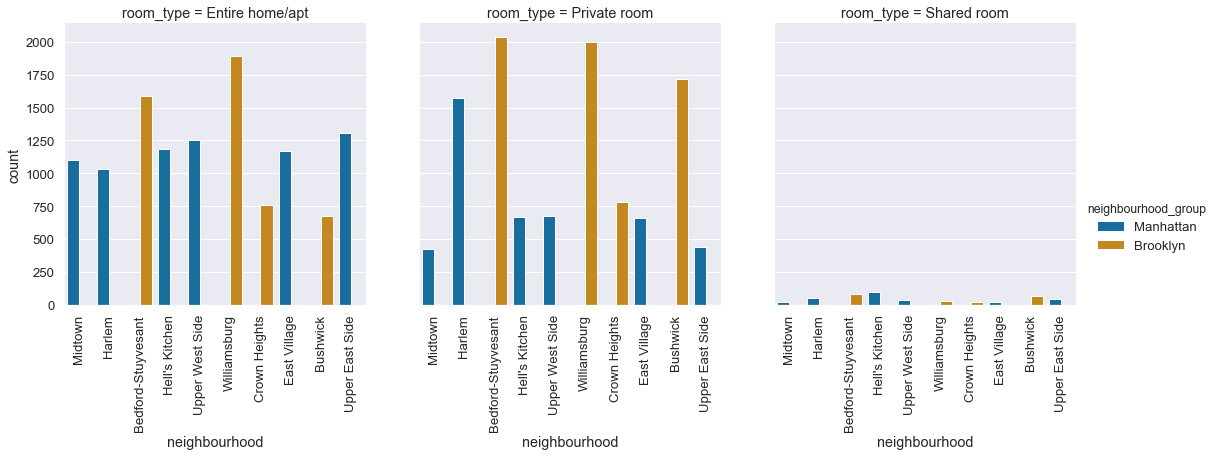

In [28]:
df_top_neighbourhood = df.loc[df['neighbourhood'].isin(top_neighbourhood)]

# using catplot to represent multiple attributes together and a count
plt.figure(figsize=(15,8))
viz = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col="room_type", data=df_top_neighbourhood, kind='count')
viz.set_xticklabels(rotation=90)
_ = plt.show()

Text(0, 0.5, '')

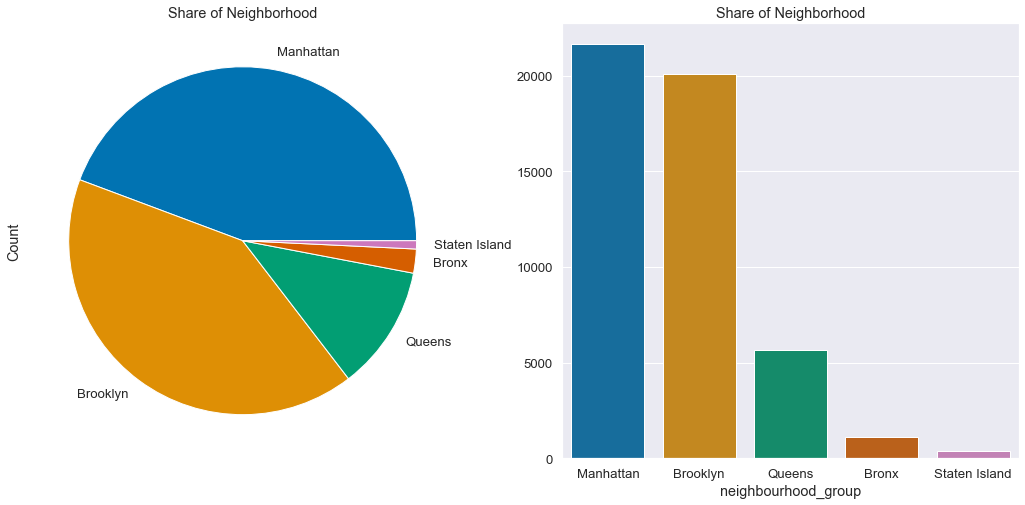

In [310]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Count')
sns.countplot('neighbourhood_group', data=df, ax=ax[1], order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
ax[1].set_ylabel('')

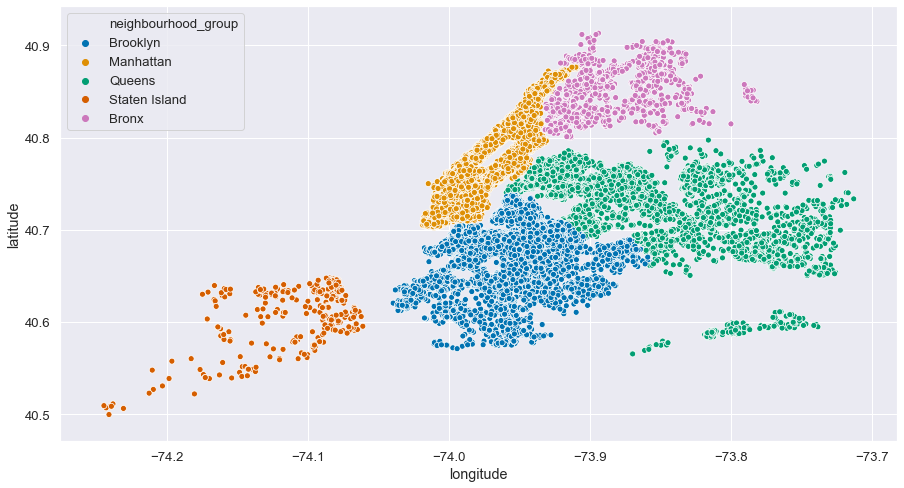

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'])
plt.ioff()

## Check How the price varies with area

In [35]:
nei_group = df['neighbourhood_group'].unique()

(0, 2000)

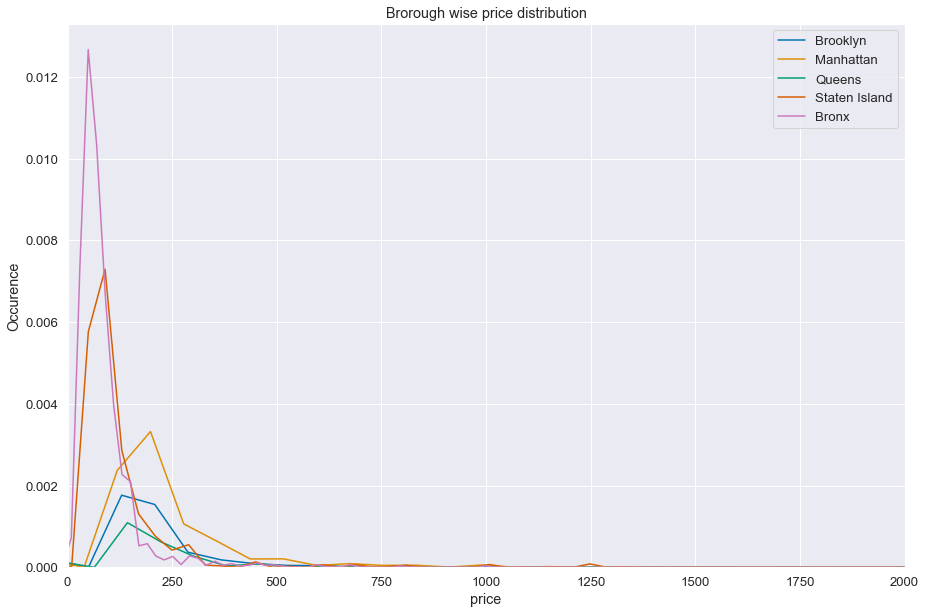

In [50]:
plt.figure(figsize=(15,10))
for nei in nei_group:
    sns.distplot(df[df.neighbourhood_group==nei].price, hist=False, kde=True, label=nei)
    plt.legend()
plt.title('Brorough wise price distribution')
plt.ylabel('Occurence')
plt.xlim(0,2000)

We can see that Staten Islend and the Bronx are the borough that offers the lowest priced rooms, on the other hand Manhattan has the most expensive.

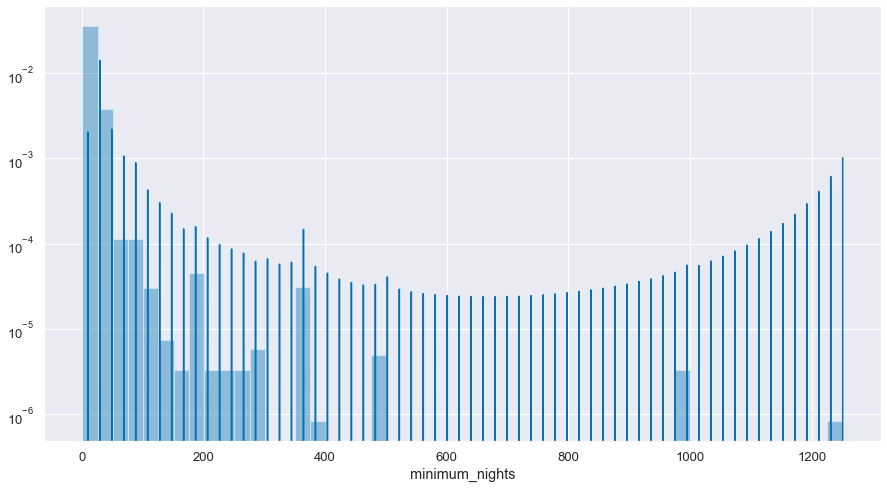

In [53]:
plt.figure(figsize=(15,8))
sns.distplot(df.minimum_nights).set_yscale('log')

## Categorising based on Price

In [58]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [59]:
def rank_price_hotel(hotel_price):
    if hotel_price<=70:
        return 'Low'
    elif hotel_price >70 and hotel_price <=500:
        return 'Medium'
    else:
        return 'High'

Text(0, 0.5, 'Occurence')

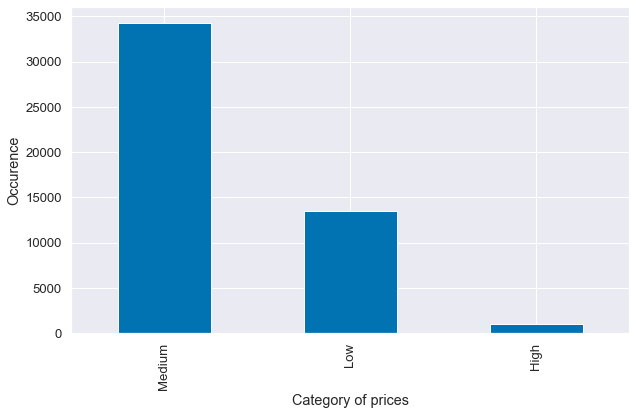

In [63]:
plt.figure(figsize=(10,6))
df['price'].apply(rank_price_hotel).value_counts().plot(kind="bar")
plt.xlabel('Category of prices')
plt.ylabel('Occurence')

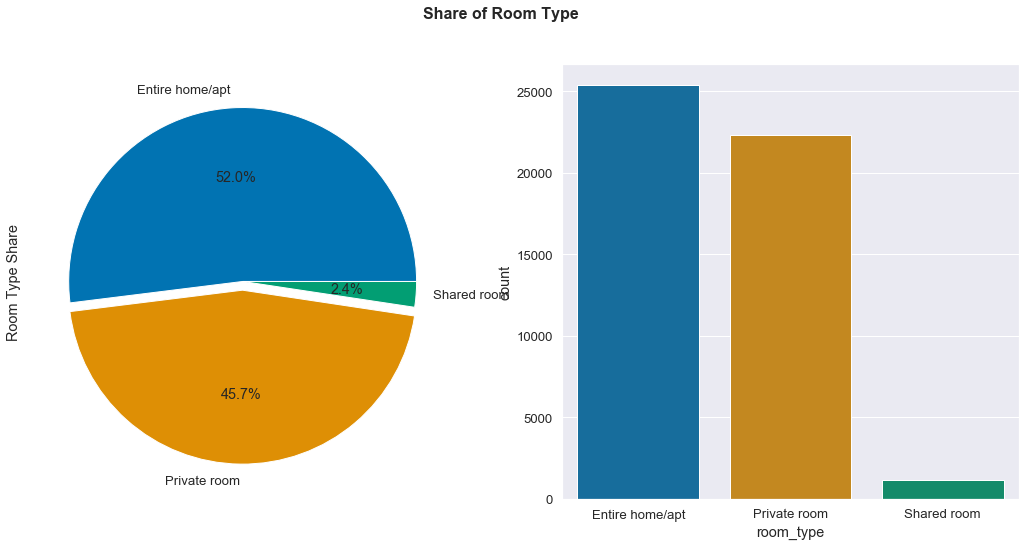

In [82]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
f.suptitle("Share of Room Type", fontsize=16, weight="bold")
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0], autopct='%1.1f%%', ax=ax[0])
ax[0].set_ylabel('Room Type Share')
sns.countplot(x="room_type", data=df, ax=ax[1], order=df['room_type'].value_counts().index)

We can see that Entire home apartment has the highest share followed by private room and least prefered is Shared room

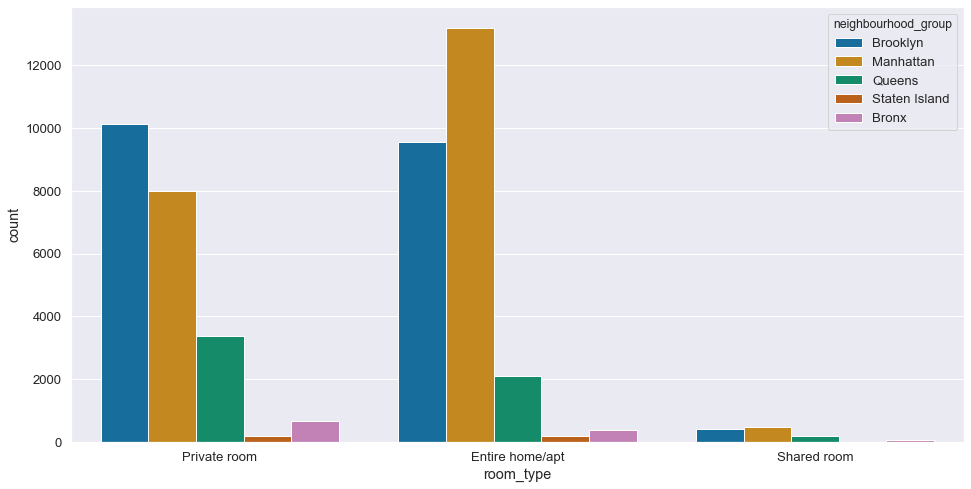

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x='room_type', hue="neighbourhood_group", data=df)